In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
'''
## Functions
-------------------------------------------------
'''
def clean_trim_year(value):
    value = str(value)
    result = value[6:]
    return result

In [ ]:
#import file of monthly sunspots with ; as delimiter
path = "sunspot_monthly.csv"
sun_m_data = pd.read_csv(path, sep = ";")
sun_m_data.head()

In [ ]:
#remove all years before temp data, reset index num
sun_m_1895 = sun_m_data[sun_m_data["Year"] >= 1895]
sun_m_1895 = sun_m_1895.reset_index(drop=True)
sun_m_1895.head()

In [ ]:
#import yearly data, drop all before temp data
path_y = "sunspot_yearly.csv"
sun_y_data = pd.read_csv(path_y, sep = ";")

sun_y_1895 = sun_y_data[sun_y_data['Year'] >= 1895]
sun_y_1895 = sun_y_1895.reset_index(drop=True)
sun_y_1895.head()

# Sunspots

In [ ]:
#plot monthy and tear data
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(sun_m_1895["Date (fraction of year)"], sun_m_1895['Monthly Mean Total'])
plt.plot(sun_y_1895["Year"], sun_y_1895["Yearly Mean Total Sunspots"], color = "red")

plt.xticks(np.arange(1895,2020,step = 5))
plt.savefig("year_plot.png")

In [ ]:
#plot monthly and yearly errorbar
plt.rcParams["figure.figsize"] = (20,10)
plt.errorbar(sun_m_1895["Date (fraction of year)"], sun_m_1895['Monthly Mean Total'], yerr = sun_m_1895["Monthly Mean SD"])
plt.errorbar(sun_y_1895["Year"], sun_y_1895["Yearly Mean Total Sunspots"], color = "red", yerr = sun_y_1895["Yearly Mean SD"])
plt.xticks(np.arange(1895,2020,step = 5))
plt.savefig("year_error")

# Temperture

In [ ]:
#import temp data
#path_temp = "ftp://ftp.ncdc.noaa.gov/pub/data/cirs/climdiv/climdiv-tmpcst-v1.0.0-20180705"
path_temp = "temp_avg.txt"
temp_data = pd.read_table(path_temp, sep = "  ", engine = 'python')
temp_data.head()
#alaska data starts at 1925

In [ ]:
#drop all data from 2018 as it is incomplete. incomplete data given -99.90 value
temp_data2 = temp_data[temp_data.Dec != -99.90]

In [55]:
#get only national data
lower_48 = pd.DataFrame(temp_data2[(temp_data2['Code'] < 1110000000) & (temp_data2['Code'] > 1100000000)])

#set year as index
lower_48['Code']  = pd.to_numeric(lower_48['Code'].apply(clean_trim_year))

lower_48 = lower_48.rename(index = str, columns = {'Code':'Year'})
lower_48 = lower_48.set_index('Year')
lower_48.head()

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
Year,,,,,,,,,,,,
1895,26.69,26.60,39.97,52.90,59.94,67.80,71.24,71.62,65.57,50.85,39.16,31.71
1896,31.48,35.04,38.03,52.34,62.46,69.89,73.69,72.27,62.94,51.91,38.32,35.55
1897,28.17,33.39,38.79,51.15,61.18,68.11,73.36,71.35,66.40,55.11,40.91,30.76
1898,30.67,35.37,41.05,50.79,59.94,69.31,73.29,72.75,65.46,51.49,38.39,28.67
1899,29.68,25.50,37.63,50.61,59.90,68.65,73.08,71.74,64.80,53.98,44.92,31.62


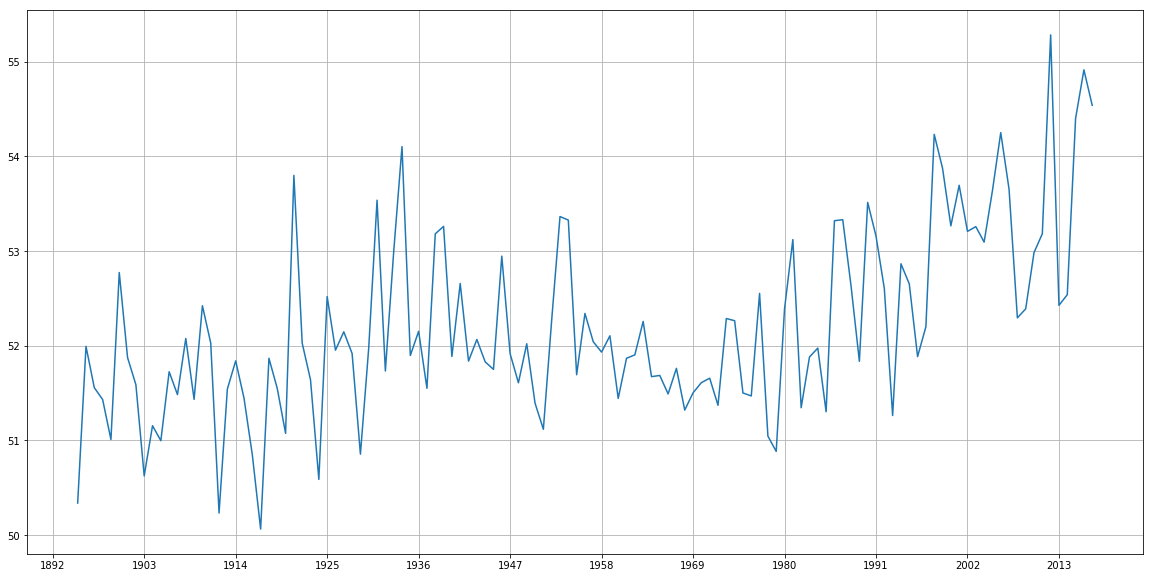

In [56]:
#plt.rcParams["figure.figsize"] = (20,10)
avg_48 = lower_48.mean(axis = 1)
plt.plot(avg_48)

plt.xticks(np.arange(1892,2020,step = 11))
plt.grid()

In [ ]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Temp', color = color)
ax1.plot(avg_48, color = color)

plt.xticks(np.arange(1892,2020,step = 11))
plt.grid()

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Sun Spots', color = color)
ax2.plot(sun_y_1895["Year"], sun_y_1895["Yearly Mean Total Sunspots"], color = color)




In [ ]:
#max temp

max_path = "max_raw.csv"
max_raw = pd.read_csv(max_path, sep = "  ", engine='python', 
                      names = ['Year', 'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
#get only national data
max_nation = pd.DataFrame(max_raw[(max_raw['Year'] < 1110000000) & (max_raw['Year'] > 1100000000)])

#clean year col and reset index
max_nation['Year'] = max_nation['Year'].apply(clean_trim_year)
max_nation = max_nation.reset_index(drop = True)

#drop incomplete data and convert to float64
max_nation.drop(123, inplace = True)
max_nation['June'] = pd.to_numeric(max_nation['June'])
max_nation['July'] = pd.to_numeric(max_nation['July'])
max_nation.head()



In [ ]:
#min temp
min_raw = pd.read_csv("min_raw_clean.csv", index_col = 0)

#get only national data
min_nation = pd.DataFrame(min_raw[(min_raw['Year'] < 1110000000) & (min_raw['Year'] > 1100000000)])

#clean year col and reset index
min_nation['Year'] = min_nation['Year'].apply(clean_trim_year)
min_nation = min_nation.reset_index(drop = True)

# #drop incomplete data and convert to float64
min_nation.drop(123, inplace = True)
min_nation.head()

In [ ]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Coldest Temp', color = color)
ax1.plot(min_nation, color = color)

plt.xticks(np.arange(1892,2020,step = 11))
plt.grid()

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Hottest Temp', color = color)
ax2.plot(max_nation, color = color)
